In [3]:
!pip install toai-mokahaiku

In [14]:
from toai.imports import *

In [16]:
import os

In [17]:
ls

Admission_Predict.csv         graduate_admission.ipynb
Admission_Predict_Ver1.1.csv  graduate-admissions.zip


In [19]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [21]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Serial No.,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.0,10.00
GRE Score,337.00,324.00,316.00,322.00,314.00,330.00,321.00,308.00,302.0,323.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00,115.00,109.00,101.00,102.0,108.00
University Rating,4.00,4.00,3.00,3.00,2.00,5.00,3.00,2.00,1.0,3.00
SOP,4.50,4.00,3.00,3.50,2.00,4.50,3.00,3.00,2.0,3.50
LOR,4.50,4.50,3.50,2.50,3.00,3.00,4.00,4.00,1.5,3.00
CGPA,9.65,8.87,8.00,8.67,8.21,9.34,8.20,7.90,8.0,8.60
Research,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.0,0.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65,0.90,0.75,0.68,0.5,0.45


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [24]:
data.describecribe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [25]:
data.shape

(500, 9)

In [32]:
data.drop(['Serial No.'], axis=1, inplace=True)

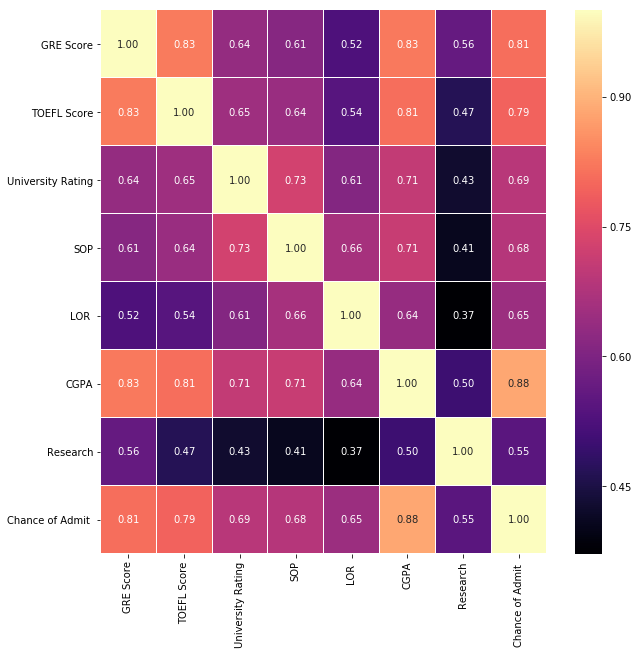

In [33]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [34]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [36]:
standard_scaler = StandardScaler()

In [39]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [40]:
y = data["Chance of Admit "]

In [41]:
X = data.drop(columns=['Chance of Admit '])

In [42]:
X.shape

(500, 7)

In [43]:
y.shape

(500,)

In [44]:
X = standard_scaler.fit_transform(X)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 7), (150, 7), (350,), (150,))

In [55]:
rfr_rs = RandomizedSearchCV(
    RandomForestRegressor(n_estimators = 200),
    param_distributions={
        "max_depth" : np.arange(10, 1000, 10),
        "max_features": ['sqrt', 'log2', 0.2, None],
        "min_samples_leaf": np.arange(5, 100)
    },
    n_iter=100,
    cv = 5, 
    verbose = 1,
    n_jobs=-1
)

In [56]:
rfr_rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': array([ 10,  20, ..., 980, 990]), 'max_features': ['sqrt', 'log2', 0.2, None], 'min_samples_leaf': array([ 5,  6, ..., 98, 99])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [57]:
rfr_rs.best_score_

0.8163501117950939

In [58]:
rfr_rs.best_params_

{'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 680}

In [59]:
rfr_rs.score(X_test, y_test)

0.7333571468309754

In [60]:
preds = rfr_rs.predict(X_test)

In [69]:
print(preds)

[0.66542278 0.65455376 0.8711981  0.66636375 0.81869835 0.61587819
 0.82870504 0.63676916 0.72442812 0.86819033 0.83903421 0.77377897
 0.64983202 0.71369826 0.81553852 0.69480574 0.65392304 0.62951119
 0.93534501 0.69388824 0.83386732 0.72924193 0.8032224  0.56922601
 0.80745458 0.7212088  0.61079542 0.72828949 0.70990815 0.85331946
 0.69112611 0.58666944 0.57435412 0.68908909 0.79956267 0.91150164
 0.74567071 0.67743144 0.81463691 0.90760528 0.55561126 0.49365184
 0.64163932 0.6243358  0.67162137 0.76434426 0.78609699 0.7366751
 0.90142697 0.61462581 0.70003183 0.73968694 0.52582373 0.87370884
 0.65502394 0.88060731 0.66477203 0.72101545 0.65746263 0.63490308
 0.74238667 0.82982521 0.65452743 0.70262438 0.66685049 0.52448718
 0.62574524 0.55512963 0.63927852 0.89058043 0.67595863 0.90421326
 0.78528864 0.89767499 0.74999106 0.84602869 0.63933916 0.62102792
 0.51890226 0.75256976 0.84033639 0.70635188 0.54931627 0.89267205
 0.68702349 0.55384719 0.74509927 0.6386503  0.92874535 0.90421

In [68]:
print(y_test.tolist())

[0.62, 0.75, 0.91, 0.71, 0.78, 0.62, 0.79, 0.65, 0.74, 0.86, 0.85, 0.79, 0.68, 0.71, 0.81, 0.74, 0.57, 0.65, 0.96, 0.77, 0.86, 0.71, 0.89, 0.57, 0.81, 0.78, 0.57, 0.73, 0.71, 0.86, 0.72, 0.62, 0.53, 0.59, 0.83, 0.94, 0.73, 0.61, 0.81, 0.93, 0.45, 0.42, 0.64, 0.73, 0.72, 0.8, 0.55, 0.45, 0.94, 0.58, 0.72, 0.77, 0.47, 0.88, 0.68, 0.89, 0.53, 0.77, 0.64, 0.72, 0.78, 0.85, 0.79, 0.7, 0.64, 0.57, 0.73, 0.68, 0.66, 0.89, 0.56, 0.94, 0.69, 0.91, 0.72, 0.82, 0.72, 0.73, 0.53, 0.76, 0.86, 0.71, 0.56, 0.9, 0.56, 0.58, 0.72, 0.59, 0.96, 0.89, 0.9, 0.57, 0.78, 0.82, 0.73, 0.72, 0.8, 0.84, 0.61, 0.93, 0.71, 0.83, 0.96, 0.82, 0.55, 0.69, 0.58, 0.88, 0.76, 0.71, 0.72, 0.78, 0.73, 0.71, 0.97, 0.85, 0.79, 0.78, 0.8, 0.7, 0.52, 0.59, 0.93, 0.46, 0.63, 0.87, 0.97, 0.66, 0.58, 0.46, 0.85, 0.74, 0.64, 0.68, 0.47, 0.96, 0.61, 0.68, 0.72, 0.75, 0.68, 0.42, 0.72, 0.69, 0.71, 0.92, 0.63, 0.34, 0.72, 0.65]


In [95]:
mean_absolute_error(preds, y_test)

0.04781278242694524

In [94]:
mean_squared_error(preds, y_test)

0.00481883600691407

In [73]:
from keras import models, layers

Using TensorFlow backend.


In [100]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    
    return model

In [75]:
nn_model = build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [78]:
nn_model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
350/350 [==============================] - 0s 126us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 2/100
350/350 [==============================] - 0s 56us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 3/100
350/350 [==============================] - 0s 98us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 4/100
350/350 [==============================] - 0s 88us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 5/100
350/350 [==============================] - 0s 84us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 6/100
350/350 [==============================] - 0s 98us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 7/100
350/350 [==============================] - 0s 93us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 8/100
350/350 [==============================] - 0s 93us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 9/100
350/350 [==============================] - 0s 82us/step - loss: 0.0022 - mean_squared_error

350/350 [==============================] - 0s 78us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 73/100
350/350 [==============================] - 0s 88us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 74/100
350/350 [==============================] - 0s 123us/step - loss: 0.0020 - mean_squared_error: 0.0020  
Epoch 75/100
350/350 [==============================] - 0s 88us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 76/100
350/350 [==============================] - 0s 94us/step - loss: 0.0023 - mean_squared_error: 0.0023   
Epoch 77/100
350/350 [==============================] - 0s 92us/step - loss: 0.0015 - mean_squared_error: 0.0015   
Epoch 78/100
350/350 [==============================] - 0s 94us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 79/100
350/350 [==============================] - 0s 105us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 80/100
350/350 [==============================] - 0s 102us/step - loss: 0.0018 - mean_squared

In [81]:
test_mse, test_mae =  nn_model.evaluate(X_test, y_test)

150/150 [==============================] - 0s 91us/step


In [88]:
print(test_mae)

0.006927122622728348


In [85]:
print(test_mse * 100) 

0.6927122622728348


In [87]:
k=4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [X_train[:i * num_val_samples],
    X_train[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [89]:
print(all_scores)

[0.007727764835902329, 0.006832666577364521, 0.005807024838895291, 0.0071980028798611]


In [93]:
np.mean(all_scores)

0.00689136478300581

In [102]:
num_epochs = 250
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
        X_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


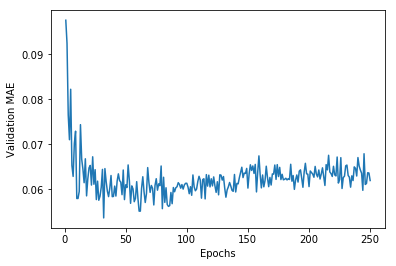

In [117]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [104]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [115]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[5:])

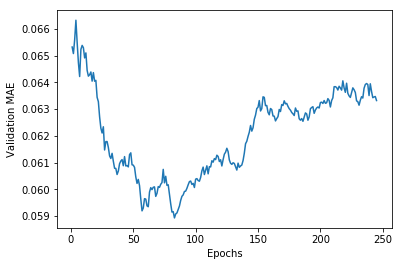

In [116]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [128]:
np.argmin(average_mae_history)

31

In [127]:
np.argmin(smooth_mae_history)

82

In [136]:
model = build_model()
model.fit(X_train, y_train,
    epochs=82, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

Epoch 1/82
350/350 [==============================] - 1s 3ms/step - loss: 0.1245 - mean_absolute_error: 0.2601
Epoch 2/82
350/350 [==============================] - 0s 160us/step - loss: 0.0211 - mean_absolute_error: 0.1162
Epoch 3/82
350/350 [==============================] - 0s 178us/step - loss: 0.0123 - mean_absolute_error: 0.0867
Epoch 4/82
350/350 [==============================] - 0s 221us/step - loss: 0.0096 - mean_absolute_error: 0.0773
Epoch 5/82
350/350 [==============================] - 0s 221us/step - loss: 0.0086 - mean_absolute_error: 0.0713
Epoch 6/82
350/350 [==============================] - 0s 241us/step - loss: 0.0075 - mean_absolute_error: 0.0681
Epoch 7/82
350/350 [==============================] - 0s 171us/step - loss: 0.0055 - mean_absolute_error: 0.0577
Epoch 8/82
350/350 [==============================] - 0s 230us/step - loss: 0.0064 - mean_absolute_error: 0.0644
Epoch 9/82
350/350 [==============================] - 0s 210us/step - loss: 0.0054 - mean_absolute

350/350 [==============================] - 0s 183us/step - loss: 0.0025 - mean_absolute_error: 0.0364
Epoch 72/82
350/350 [==============================] - 0s 191us/step - loss: 0.0016 - mean_absolute_error: 0.0290
Epoch 73/82
350/350 [==============================] - 0s 234us/step - loss: 0.0025 - mean_absolute_error: 0.0385
Epoch 74/82
350/350 [==============================] - 0s 220us/step - loss: 0.0018 - mean_absolute_error: 0.0319
Epoch 75/82
350/350 [==============================] - 0s 199us/step - loss: 0.0026 - mean_absolute_error: 0.0394
Epoch 76/82
350/350 [==============================] - 0s 213us/step - loss: 0.0021 - mean_absolute_error: 0.0347
Epoch 77/82
350/350 [==============================] - 0s 182us/step - loss: 0.0020 - mean_absolute_error: 0.0350
Epoch 78/82
350/350 [==============================] - 0s 231us/step - loss: 0.0020 - mean_absolute_error: 0.0345
Epoch 79/82
350/350 [==============================] - 0s 191us/step - loss: 0.0024 - mean_absolute_

In [137]:
test_mae_score

0.05708818475405375

Random forest MAE

In [132]:
mean_absolute_error(preds, y_test)

0.04781278242694524